In [ ]:
%pwd

'/home/ec2-user/SageMaker/code/makemore/notebooks'

In [1]:
import tqdm.auto as tqdm

In [2]:
import torch

In [3]:
with open("../names.txt") as f:
    words = f.read().splitlines()

In [4]:
EOF = '.'
token2idx = {EOF: 0}
idx2token = {0: EOF}

for idx, token in enumerate(sorted(list(set(''.join(words)))), start=1):
    token2idx[token] = idx
    idx2token[idx] = token

def encode(token):
    return token2idx[token]

def decode(idx):
    return idx2token[idx]

vocab_size = len(token2idx)
vocab_size

27

In [ ]:
# {name:[encode(c) for c in name] for name in names[:3]}

In [5]:
for word in words[:3]:
    seq = [EOF] + list(word) + [EOF]
    for i in range(len(seq)-1):
        pair = (seq[i], seq[i+1])
        print(f"{pair}")

('.', 'e')
('e', 'm')
('m', 'm')
('m', 'a')
('a', '.')
('.', 'o')
('o', 'l')
('l', 'i')
('i', 'v')
('v', 'i')
('i', 'a')
('a', '.')
('.', 'a')
('a', 'v')
('v', 'a')
('a', '.')


In [6]:
counts = {}
for word in tqdm.tqdm(words):
    seq = [EOF] + list(word) + [EOF]
    for i in range(len(seq)-1):
        pair = (seq[i], seq[i+1])
        counts[pair] = counts.get(pair, 0) + 1

  0%|          | 0/32033 [00:00<?, ?it/s]

In [7]:
sorted(counts.items(), key = lambda kv: kv[1], reverse=True)[:5]

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983)]

In [133]:
counts = torch.zeros((vocab_size, vocab_size), dtype = torch.int32)

for word in tqdm.tqdm(words):
    seq = [EOF] + list(word) + [EOF]
    for i in range(len(seq)-1):
        pair = (encode(seq[i]), encode(seq[i+1]))
        counts[pair] += 1

  0%|          | 0/32033 [00:00<?, ?it/s]

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

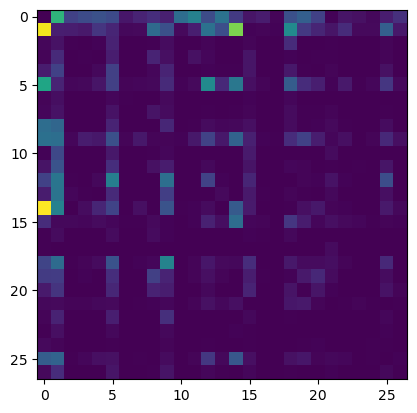

In [135]:
plt.imshow(counts)

## Small digression here: let's try to make an animation

### Trying to use native matplotlib animation

In [ ]:
# %matplotlib notebook

# import matplotlib
# import matplotlib.pyplot as plt

# import matplotlib.animation as animation

In [ ]:
# %pip install ffmpeg-python

In [ ]:
# fps = 30
# seconds = 5

# pbar = tqdm.tqdm("rendering animation", total=seconds * fps)

# counts = torch.zeros((vocab_size, vocab_size), dtype = torch.int32)

# fig = plt.figure( figsize=(8,8) )
# im = plt.imshow(counts, interpolation='none', aspect='auto', vmin=0, vmax=1)

# def render_frame(i):
#     word = words[i]
#     seq = ['<EOF>'] + list(word) + ['<EOF>']
#     for i in range(len(seq)-1):
#         pair = (encode(seq[i]), encode(seq[i+1]))
#         counts[pair] += 1

#     im.set_array(counts)

#     pbar.update(1)
#     return [im]

# anim = animation.FuncAnimation(fig, render_frame, frames = seconds * fps, interval = 1000 / fps)
# anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

### Trying to do the same with celluloid library

In [ ]:
# %pip install celluloid

In [ ]:
# %matplotlib notebook
# from celluloid import Camera

# frames = 30
# seconds = 5
# total_frames = int(frames * seconds)
# iterations_per_frame = int(len(words) // total_frames)

# fig = plt.figure( figsize=(8,8) )
# camera = Camera(fig)
# counts = torch.zeros((vocab_size, vocab_size), dtype = torch.int32)
# for word_idx, word in enumerate(tqdm.tqdm(words, desc="rendering animation"), start=1):
#     seq = ['<EOF>'] + list(word) + ['<EOF>']
#     for i in range(len(seq)-1):
#         pair = (encode(seq[i]), encode(seq[i+1]))
#         counts[pair] += 1
#     if word_idx % iterations_per_frame == 0:
#         im = plt.imshow(counts)
#         plt.pause(0.1)
#         camera.snap()

# animation = camera.animate()
# animation.save('animation.gif', writer='Pillow', fps=frames)

In [ ]:
# counts

In [ ]:
# %matplotlib inline
# plt.imshow(counts)

## Continue with our stuff

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(counts, cmap="Blues")
for i in range(vocab_size):
    for j in range(vocab_size):
        title = decode(i) + decode(j)
        plt.text(j, i, title, ha="center", va="bottom", color="gray")
        plt.text(j, i, counts[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

## Sampling from the distribution:

In [137]:
probs = counts / counts.sum(axis=1, keepdim=True)

In [ ]:
plt.imshow(probs)

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(probs, cmap="Blues")
for i in range(vocab_size):
    for j in range(vocab_size):
        title = decode(i) + decode(j)
        plt.text(j, i, title, ha="center", va="bottom", color="gray")
        plt.text(j, i, f"{probs[i, j].item():.02f}", ha="center", va="top", color="gray")
plt.axis("off")

In [151]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [152]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [153]:
g = torch.Generator().manual_seed(2147483647)
curr_idx = torch.tensor(encode('.'))
for seq_idx in range(10):
    next_idx = torch.multinomial(probs[curr_idx], num_samples=1, replacement=True, generator=g)[0]
    print(f"[{seq_idx}]: {decode(curr_idx.item())} -> {decode(next_idx.item())} (prob={probs[curr_idx, next_idx].item()*100:.02f}%)")
    curr_idx = next_idx
    if decode(next_idx.item()) == '.':
        break

[0]: . -> j (prob=7.56%)
[1]: j -> u (prob=6.97%)
[2]: u -> n (prob=8.77%)
[3]: n -> i (prob=9.41%)
[4]: i -> d (prob=2.49%)
[5]: d -> e (prob=23.34%)
[6]: e -> . (prob=19.50%)


In [154]:
def gen_sequence(probs, max_length=1000, init_token='.', generator=None):
    result = []
    curr_idx = encode(init_token)
    for _ in range(max_length):
        curr_idx = torch.multinomial(probs[curr_idx], num_samples=1, replacement=True, generator=generator)[0]
        curr_token = decode(curr_idx.item())
        if curr_token == '.':
            break
        result.append(curr_token)
    return ''.join(result)

In [155]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
    print(gen_sequence(probs=torch.ones((27,27)) / 27.0, generator=g))

juwjdvdipkcqaz
p
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz
rjpiufmthdt
rkrrsru
iyumuyfy
mjekujcbkhvupwyhvpvhvccragr
wdkhwfdztta
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat


In [156]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
    print(gen_sequence(probs, generator=g))

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias


## Evaluate the quality of the model by defining a loss function

### Calculating the training loss on the entire training dataset & a few hand-crafted examples

In [166]:
log_likelihood = 0

examples = 0

for word in tqdm.tqdm(words):
    seq = [EOF] + list(word) + [EOF]
    for i in range(len(seq)-1):
        source_idx = encode(seq[i])
        target_idx = encode(seq[i+1])
        prob = probs[source_idx, target_idx]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        examples += 1
        # print(f"{decode(source_idx)} -> {decode(target_idx)}: {prob=:0.4f}, {log_prob=:0.4f}, {log_likelihood=:0.4f}")

nll = - log_likelihood
print(f"Sum Negative Log-Likelihood: {nll:0.4f}")
print(f"Avg Negative Log-Likelihood: {nll / examples:0.4f}")

  0%|          | 0/32033 [00:00<?, ?it/s]

Sum Negative Log-Likelihood: 559891.7500
Avg Negative Log-Likelihood: 2.4541


In [167]:
log_likelihood = 0

examples = 0

for word in ["anatolyjq"]:
    seq = [EOF] + list(word) + [EOF]
    for i in range(len(seq)-1):
        source_idx = encode(seq[i])
        target_idx = encode(seq[i+1])
        prob = probs[source_idx, target_idx]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        examples += 1
        print(f"{decode(source_idx)} -> {decode(target_idx)}: {prob=:0.4f}, {log_prob=:0.4f}, {log_likelihood=:0.4f}")

nll = - log_likelihood
print(f"Sum Negative Log-Likelihood: {nll:0.4f}")
print(f"Avg Negative Log-Likelihood: {nll / examples:0.4f}")

. -> a: prob=0.1377, log_prob=-1.9829, log_likelihood=-1.9829
a -> n: prob=0.1605, log_prob=-1.8296, log_likelihood=-3.8125
n -> a: prob=0.1624, log_prob=-1.8175, log_likelihood=-5.6299
a -> t: prob=0.0203, log_prob=-3.8984, log_likelihood=-9.5283
t -> o: prob=0.1197, log_prob=-2.1224, log_likelihood=-11.6507
o -> l: prob=0.0780, log_prob=-2.5508, log_likelihood=-14.2015
l -> y: prob=0.1138, log_prob=-2.1736, log_likelihood=-16.3751
y -> j: prob=0.0024, log_prob=-6.0522, log_likelihood=-22.4272
j -> q: prob=0.0000, log_prob=-inf, log_likelihood=-inf
q -> .: prob=0.1029, log_prob=-2.2736, log_likelihood=-inf
Sum Negative Log-Likelihood: inf
Avg Negative Log-Likelihood: inf


#### Adding model smoothing by adding fake counts:

In [ ]:
probs = (counts + 1) / (counts + 1).sum(axis=1, keepdim=True)

In [ ]:
log_likelihood = 0

examples = 0

for word in ["anatolyjq"]:
    seq = [EOF] + list(word) + [EOF]
    for i in range(len(seq)-1):
        source_idx = encode(seq[i])
        target_idx = encode(seq[i+1])
        prob = probs[source_idx, target_idx]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        examples += 1
        print(f"{decode(source_idx)} -> {decode(target_idx)}: {prob=:0.4f}, {log_prob=:0.4f}, {log_likelihood=:0.4f}")

nll = - log_likelihood
print(f"Sum Negative Log-Likelihood: {nll:0.4f}")
print(f"Avg Negative Log-Likelihood: {nll / examples:0.4f}")

## Part 2: The Neural Network approach

In [14]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [15]:
sources = []
targets = []

for word in words[:3]:
    seq = [EOF] + list(word) + [EOF]
    for i in range(len(seq)-1):
        source_idx = encode(seq[i])
        target_idx = encode(seq[i+1])
        sources.append(source_idx)
        targets.append(target_idx)


In [16]:
torch.Tensor(sources).dtype

torch.float32

In [17]:
torch.tensor(sources) ## Note that dtype gets inferred automatically in torch.tensor

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1])

In [18]:
sources = torch.tensor(sources)
targets = torch.tensor(targets)

In [19]:
sources_encoded = F.one_hot(sources, num_classes=vocab_size).float()

In [ ]:
plt.imshow(sources_encoded)

In [23]:
linear = torch.nn.Linear(vocab_size, vocab_size, bias=False)
logodds = linear(sources_encoded)
loss = F.cross_entropy(logodds, targets)
print(loss)

tensor(3.2408, grad_fn=<NllLossBackward0>)


### Putting together a training loop

In [66]:
targets = []
sources = []

for word in words[:1]:
    seq = [EOF] + list(word) + [EOF]
    for i in range(len(seq)-1):
        source_idx = encode(seq[i])
        target_idx = encode(seq[i+1])
        targets.append(target_idx)
        sources.append(source_idx)

targets = torch.tensor(targets)
sources = torch.tensor(sources)
sources = F.one_hot(sources, num_classes=vocab_size).float()

In [67]:
print(f"{sources.shape=}, {targets.shape=}")

sources.shape=torch.Size([5, 27]), targets.shape=torch.Size([5])


#### Forward pass

In [80]:
g = torch.Generator().manual_seed(2147483647)
W = torch.rand((vocab_size, vocab_size), requires_grad=True, generator=g)

In [89]:
logodds = sources @ W
counts = logodds.exp()
probs = counts / counts.sum(axis=1, keepdim=True)
loss = -probs[torch.arange(probs.shape[0]), targets].log().mean()
print(f"Loss: {loss.item()}")

Loss: 3.4429187774658203


#### Backward pass

In [87]:
lr = 0.1
W.grad = None
loss.backward()

In [88]:
W.data += lr * -W.grad

#### Making it a loop

In [95]:
targets = []
sources = []

for word in words:
    seq = [EOF] + list(word) + [EOF]
    for i in range(len(seq)-1):
        source_idx = encode(seq[i])
        target_idx = encode(seq[i+1])
        targets.append(target_idx)
        sources.append(source_idx)

targets = torch.tensor(targets)
sources = torch.tensor(sources)
sources = F.one_hot(sources, num_classes=vocab_size).float()
print(f"{sources.shape=}, {targets.shape=}")

sources.shape=torch.Size([228146, 27]), targets.shape=torch.Size([228146])


In [172]:
g = torch.Generator().manual_seed(2147483647)
W = torch.rand((vocab_size, vocab_size), requires_grad=True, generator=g)

In [173]:
losses = []

In [177]:
for _ in tqdm.tqdm(range(500)):
    logodds = sources @ W
    counts = logodds.exp()
    probs = counts / counts.sum(axis=1, keepdim=True)
    loss = -probs[torch.arange(probs.shape[0]), targets].log().mean()
    # print(f"Loss: {loss.item()}")
    losses.append(loss.item())

    W.grad = None
    loss.backward()
    W.data += -5 * W.grad

  0%|          | 0/500 [00:00<?, ?it/s]

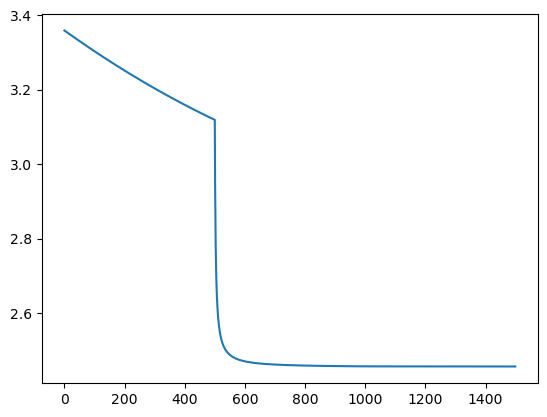

In [178]:
plt.plot(torch.tensor(losses))

In [128]:
losses[-5:]

[2.456404209136963,
 2.456404209136963,
 2.456404209136963,
 2.456404209136963,
 2.456404209136963]

In [132]:
W.shape

torch.Size([27, 27])

In [163]:
W_probs = W.data.exp()
W_probs /= W_probs.sum(axis=1, keepdims=True)

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(W_probs, cmap="Blues")
for i in range(vocab_size):
    for j in range(vocab_size):
        title = decode(i) + decode(j)
        plt.text(j, i, title, ha="center", va="bottom", color="gray")
        plt.text(j, i, f"{W_probs[i, j].item():.02f}", ha="center", va="top", color="gray")
plt.axis("off")

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(probs, cmap="Blues")
for i in range(vocab_size):
    for j in range(vocab_size):
        title = decode(i) + decode(j)
        plt.text(j, i, title, ha="center", va="bottom", color="gray")
        plt.text(j, i, f"{probs[i, j].item():.02f}", ha="center", va="top", color="gray")
plt.axis("off")

In [ ]:
W_diff = W_probs - probs

plt.figure(figsize=(16,16))
plt.imshow(W_diff, cmap="Blues")
for i in range(vocab_size):
    for j in range(vocab_size):
        title = decode(i) + decode(j)
        plt.text(j, i, title, ha="center", va="bottom", color="gray")
        plt.text(j, i, f"{W_diff[i, j].item():.02f}", ha="center", va="top", color="gray")
plt.axis("off")

## Finally how do we sample from this model?

In [157]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
    print(gen_sequence(probs, generator=g))

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias


In [171]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
    print(gen_sequence(W_probs, generator=g))

juwjdvdipkaqaz
p
cfaywecnzqfuiirltozcogsjgwzzudlhnpauyabilevhajkdbduinrwibtldsnjyievyvaftbzffvmumthyfodtumj
pfytszwjhrjagq
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihouszxhddgosfmptpacicz
rjpiufmthdt
rkrrsru
iyumuyvy
mjekujcbkhvupwyhlpvhvccragr
wdkhwfdztta


This doesn't look good, need to figure out why, but maybe i just messed up with my W_probs